1. Objetivo do Notebook

Este notebook tem como objetivo analisar a distribuição espacial, o grau de concentração produtiva e a eficiência econômica da cajucultura no estado do Piauí em nível municipal, aprofundando a compreensão do desempenho regional da atividade e de sua organização territorial.

A análise busca identificar municípios produtores-chave, padrões de especialização produtiva e desigualdades espaciais, fornecendo subsídios para a avaliação de fatores administrativos, logísticos e institucionais que impactam a cadeia produtiva da cajucultura no estado.

2. Relação com os Objetivos do Projeto de Pesquisa

Este notebook atende diretamente aos seguintes Objetivos Específicos do estudo:

- Objetivo Específico 3
Investigar como a gestão (administração da produção, logística e comercialização) afeta o desempenho do setor.

- Objetivo Específico 4
Analisar o papel das políticas públicas, incentivos e investimentos no fortalecimento da cajucultura.

Ao descer a escala de análise do nível estadual para o nível municipal, este notebook permite avaliar como a organização territorial da produção influencia o desempenho econômico da atividade.

3. Justificativa Metodológica da Escala Municipal

A opção pela análise municipal fundamenta-se no fato de que a cajucultura no Piauí apresenta heterogeneidade espacial significativa, com forte concentração produtiva em determinados territórios.

Além disso:

As bases utilizadas já se encontram recortadas especificamente para o estado do Piauí;

Não é necessária a filtragem por Unidade da Federação (sigla_uf);

A análise municipal permite identificar clusters produtivos, territórios especializados e diferenças de eficiência econômica.

Essa abordagem amplia o rigor analítico do estudo e fortalece sua contribuição empírica.

4. Base de Dados Utilizada

Os dados utilizados neste notebook são provenientes da Pesquisa Agrícola Municipal (PAM/IBGE), organizados em planilhas temáticas específicas para o estado do Piauí.

Tabelas Utilizadas

5. caju_castanha_piaui_desempenho.csv

6. caju_castanha_piaui_municipios.csv
→ Produção da cajucultura por município

7. Especialização municipal (Piauí).csv
→ Indicadores de especialização produtiva municipal

8. Análise de concentração produtiva municipal.csv
→ Índices de concentração da produção da cajucultura

9. Análise de eficiência econômica municipal (Piauí).csv
→ Indicadores de eficiência econômica da produção municipal

Essas bases permitem analisar simultaneamente volume produtivo, especialização territorial, concentração e desempenho econômico.

5. Estratégia Analítica do Notebook

A análise será conduzida em três etapas complementares:

- Análise descritiva municipal
- Identificação dos principais municípios produtores
- Comparação de níveis de produção e valor econômico
- Análise espacial da cajucultura
- Mapeamento da produção municipal
- Visualização da concentração produtiva
- Análise de eficiência econômica territorial
- Avaliação da relação entre produção física e valor gerado
- Identificação de municípios com maior eficiência relativa

Essa estratégia permite integrar análise quantitativa, espacial e econômica, alinhando-se aos objetivos do estudo.

6. Encaminhamento para as Próximas Etapas

Após a preparação do ambiente computacional e a inspeção das bases de dados, o notebook avançará para:

- Construção de mapas temáticos municipais;
- Análise visual da concentração produtiva e da eficiência econômica;
- Síntese interpretativa dos resultados à luz da gestão da cadeia produtiva e das políticas públicas.

4. Importação das Bibliotecas e definição do caminho base


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# Definindo o caminho base para os dados
BASE_PATH = Path("..") / "Pesquisa Agrícola Municipal (PAM)"

def load_csv(filename):
    return pd.read_csv(
        BASE_PATH / filename,
        sep=",",
        encoding="latin1"
    )


# padronização 

def padronizar_colunas(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )
    return df



In [25]:
def load_csv(filename):
    try:
        return pd.read_csv(
            BASE_PATH / filename,
            sep=",",
            encoding="utf-8"
        )
    except UnicodeDecodeError:
        return pd.read_csv(
            BASE_PATH / filename,
            sep=",",
            encoding="latin1"
        )


In [26]:
def padronizar_colunas(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(";", "", regex=False)
    )
    return df


In [27]:
piaui_geral = load_csv("5. caju_castanha_piaui_desempenho_geral.csv")
piaui_geral = padronizar_colunas(piaui_geral)

piaui_geral.head()
piaui_geral.info()


<class 'pandas.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   102 non-null    int64  
 1   produto               102 non-null    str    
 2   area_colhida_ha       51 non-null     float64
 3   producao_total        51 non-null     float64
 4   produtividade_media   51 non-null     float64
 5   valor_total_producao  51 non-null     float64
dtypes: float64(4), int64(1), str(1)
memory usage: 4.9 KB


In [28]:
piaui_municipios = load_csv("6. caju_castanha_piaui_municipios.csv")
piaui_municipios = padronizar_colunas(piaui_municipios)

piaui_municipios.head()
piaui_municipios.info()


<class 'pandas.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   7068 non-null   int64  
 1   id_municipio          7068 non-null   int64  
 2   nome_municipio        7068 non-null   str    
 3   produto               7068 non-null   str    
 4   area_colhida_ha       7068 non-null   int64  
 5   producao_total        7068 non-null   float64
 6   produtividade_media   7065 non-null   float64
 7   valor_total_producao  7068 non-null   str    
dtypes: float64(2), int64(3), str(3)
memory usage: 441.9 KB


In [29]:
especializacao = load_csv("7. Especialização municipal (Piauí).csv")
especializacao = padronizar_colunas(especializacao)

especializacao.head()
especializacao.info()

<class 'pandas.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id_municipio         211 non-null    int64
 1   nome_municipio       211 non-null    str  
 2   quantidade_produtos  211 non-null    int64
dtypes: int64(2), str(1)
memory usage: 5.1 KB


In [30]:
concentracao = load_csv("8. Análise de concentração produtiva municipal.csv")
concentracao = padronizar_colunas(concentracao)

concentracao.head()
concentracao.info()

<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nome_municipio        10 non-null     str    
 1   valor_total_producao  10 non-null     float64
dtypes: float64(1), str(1)
memory usage: 288.0 bytes


In [31]:
eficiencia = load_csv("9. Análise de eficiência econômica municipal (PIAUÍ).csv")
eficiencia = padronizar_colunas(eficiencia)

eficiencia.head()
eficiencia.info()

<class 'pandas.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nome_municipio       212 non-null    str    
 1   produtividade_kg_ha  212 non-null    float64
 2   valor_por_hectare    212 non-null    float64
dtypes: float64(2), str(1)
memory usage: 5.1 KB


In [32]:
municipios_castanha = piaui_municipios[
    piaui_municipios["produto"] == "Castanha de caju"
].copy()


In [33]:
# Garantir que é string
piaui_municipios["valor_total_producao"] = (
    piaui_municipios["valor_total_producao"]
    .astype(str)
    # remover tudo que não seja dígito ou ponto
    .str.replace(r"[^0-9\.]", "", regex=True)
)

# Converter para numérico (forçando erros para NaN)
piaui_municipios["valor_total_producao"] = pd.to_numeric(
    piaui_municipios["valor_total_producao"],
    errors="coerce"
)



In [34]:
piaui_municipios["valor_total_producao"].head()
piaui_municipios["valor_total_producao"].describe()


count     7068.000000
mean       149.802140
std        900.303417
min          0.000000
25%          1.000000
50%         13.000000
75%         68.000000
max      30040.000000
Name: valor_total_producao, dtype: float64

In [35]:
piaui_municipios.info()


<class 'pandas.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   7068 non-null   int64  
 1   id_municipio          7068 non-null   int64  
 2   nome_municipio        7068 non-null   str    
 3   produto               7068 non-null   str    
 4   area_colhida_ha       7068 non-null   int64  
 5   producao_total        7068 non-null   float64
 6   produtividade_media   7065 non-null   float64
 7   valor_total_producao  7068 non-null   float64
dtypes: float64(3), int64(3), str(2)
memory usage: 441.9 KB


BLOCO A 

Gráfico 1 — Evolução da Produção e do Valor da Cajucultura no Piauí (1974–2024)

 O que esse gráfico analisa

- Evolução temporal da atividade no estado
- Relação entre produção física e valor econômico

Evidências indiretas de:

- ganhos/perdas de eficiência
- efeitos de políticas públicas
- mudanças tecnológicas e organizacionais

Pré-requisito (muito importante)

Vamos trabalhar somente com Castanha de Caju, pois: é o produto economicamente relevante “Caju” (pseudofruto) aparece com NaN e distorce análise

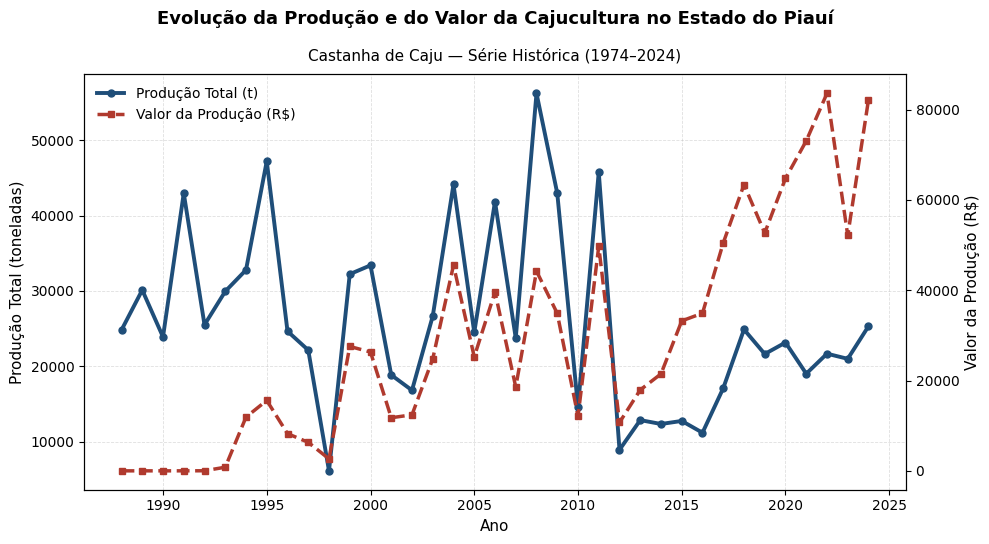

In [36]:

base_castanha_piaui = (
    piaui_geral
    [piaui_geral["produto"] == "Castanha de caju"]
    .sort_values("ano")
)

# Criar figura
fig, ax1 = plt.subplots(figsize=(10, 5.5))

# Produção Total — eixo esquerdo
ax1.plot(
    base_castanha_piaui["ano"],
    base_castanha_piaui["producao_total"],
    color="#1f4e79",
    linewidth=2.8,
    marker="o",
    markersize=5,
    label="Produção Total (t)"
)

ax1.set_xlabel("Ano", fontsize=11)
ax1.set_ylabel("Produção Total (toneladas)", fontsize=11)
ax1.ticklabel_format(style="plain", axis="y")
ax1.tick_params(axis="both", labelsize=10)

# Valor da Produção — eixo direito
ax2 = ax1.twinx()
ax2.plot(
    base_castanha_piaui["ano"],
    base_castanha_piaui["valor_total_producao"],
    color="#b03a2e",
    linewidth=2.5,
    linestyle="--",
    marker="s",
    markersize=4,
    label="Valor da Produção (R$)"
)

ax2.set_ylabel("Valor da Produção (R$)", fontsize=11)
ax2.ticklabel_format(style="plain", axis="y")
ax2.tick_params(axis="y", labelsize=10)

# Título e subtítulo
fig.suptitle(
    "Evolução da Produção e do Valor da Cajucultura no Estado do Piauí",
    fontsize=13,
    fontweight="bold"
)

ax1.set_title(
    "Castanha de Caju — Série Histórica (1974–2024)",
    fontsize=11,
    pad=10
)

# Legenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper left",
    frameon=False,
    fontsize=10
)

# Grid acadêmico
ax1.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


Gráfico 2 — Curva de Concentração da Produção Municipal
Cajucultura no Estado do Piauí (Castanha de Caju)

Este gráfico responde diretamente a:

- Concentração produtiva
- Desigualdade entre municípios
- Organização territorial da produção

Ele mostra quantos municípios concentram a maior parte da produção, o que é central para análises de gestão, logística e políticas públicas.

Gráfico 2 — Produção Total × Produtividade Média
Cajucultura Municipal no Piauí (Castanha de Caju)

Objetivo técnico do gráfico
Este gráfico serve para avaliar eficiência técnica da produção municipal, ou seja:

- municípios que produzem muito com alta produtividade;
- municípios que produzem muito com baixa produtividade;
- possíveis gargalos de manejo, tecnologia ou assistência técnica.

Ele dialoga diretamente com o Objetivo Específico 3.

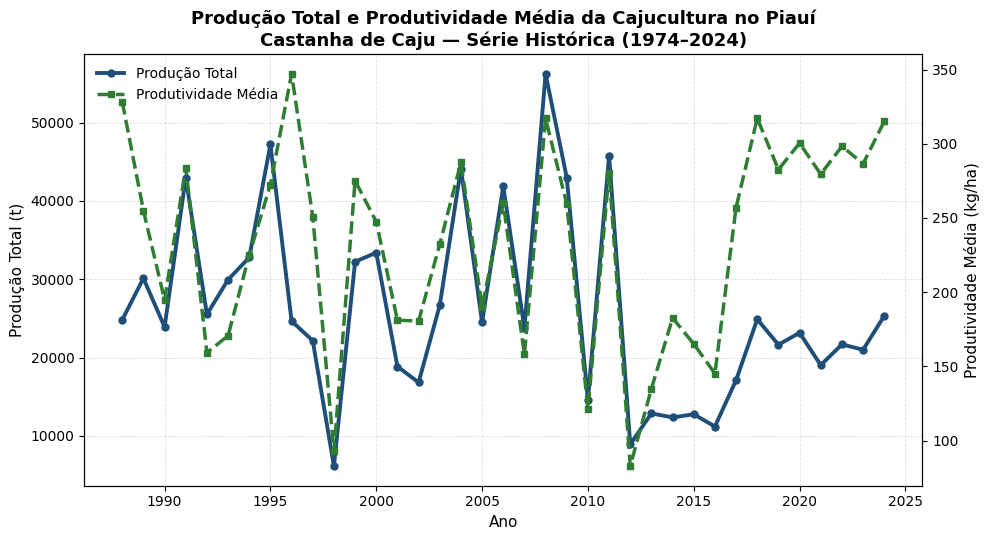

In [38]:
base_castanha_piaui = (
    piaui_geral
    [piaui_geral["produto"] == "Castanha de caju"]
    .sort_values("ano")
)

# Criar figura
fig, ax1 = plt.subplots(figsize=(10, 5.5))

# Produção Total — eixo esquerdo
ax1.plot(
    base_castanha_piaui["ano"],
    base_castanha_piaui["producao_total"],
    color="#1f4e79",
    linewidth=2.8,
    marker="o",
    markersize=5,
    label="Produção Total"
)

ax1.set_xlabel("Ano", fontsize=11)
ax1.set_ylabel("Produção Total (t)", fontsize=11)
ax1.ticklabel_format(style="plain", axis="y")
ax1.tick_params(axis="y", labelsize=10)

# Produtividade Média — eixo direito
ax2 = ax1.twinx()
ax2.plot(
    base_castanha_piaui["ano"],
    base_castanha_piaui["produtividade_media"],
    color="#2e7d32",
    linewidth=2.5,
    linestyle="--",
    marker="s",
    markersize=4,
    label="Produtividade Média"
)

ax2.set_ylabel("Produtividade Média (kg/ha)", fontsize=11)
ax2.tick_params(axis="y", labelsize=10)

# Título
plt.title(
    "Produção Total e Produtividade Média da Cajucultura no Piauí\n"
    "Castanha de Caju — Série Histórica (1974–2024)",
    fontsize=13,
    fontweight="bold"
)

# Legenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper left",
    frameon=False,
    fontsize=10
)

# Grid acadêmico
ax1.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()

BLOCO B

Gráfico B1 — Curva de Concentração da Produção Municipal
Mede desigualdade e concentração produtiva.

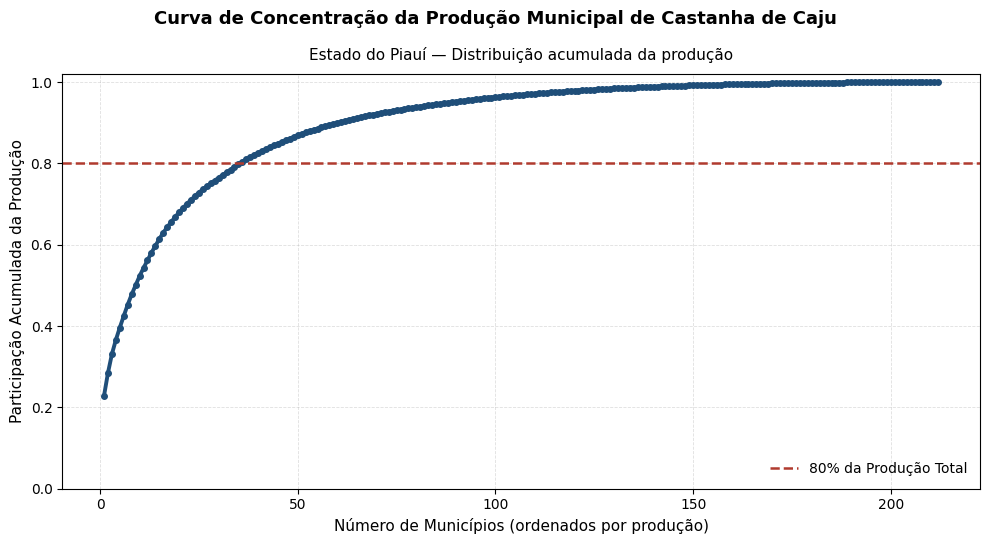

In [ ]:
# Participação e participação acumulada
base_castanha_municipal["participacao"] = ( # type: ignore
    base_castanha_municipal["producao_total"] # type: ignore
    / base_castanha_municipal["producao_total"].sum() # type: ignore
)

base_castanha_municipal["participacao_acumulada"] = (  # type: ignore
    base_castanha_municipal["participacao"].cumsum()  # type: ignore
)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5.5))

ax.plot(
    range(1, len(base_castanha_municipal) + 1), # type: ignore
    base_castanha_municipal["participacao_acumulada"], # type: ignore
    color="#1f4e79",
    linewidth=2.8,
    marker="o",
    markersize=4
)

ax.axhline(
    y=0.8,
    color="#b03a2e",
    linestyle="--",
    linewidth=1.8,
    label="80% da Produção Total"
)

ax.set_xlabel("Número de Municípios (ordenados por produção)", fontsize=11)
ax.set_ylabel("Participação Acumulada da Produção", fontsize=11)
ax.set_ylim(0, 1.02)

fig.suptitle(
    "Curva de Concentração da Produção Municipal de Castanha de Caju",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Estado do Piauí — Distribuição acumulada da produção",
    fontsize=11,
    pad=10
)

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)
ax.legend(frameon=False, fontsize=10, loc="lower right")

plt.tight_layout()
plt.show()


Gráfico B2 — Participação dos Principais Municípios Produtores

Evidencia quem concentra a produção (Top municípios)

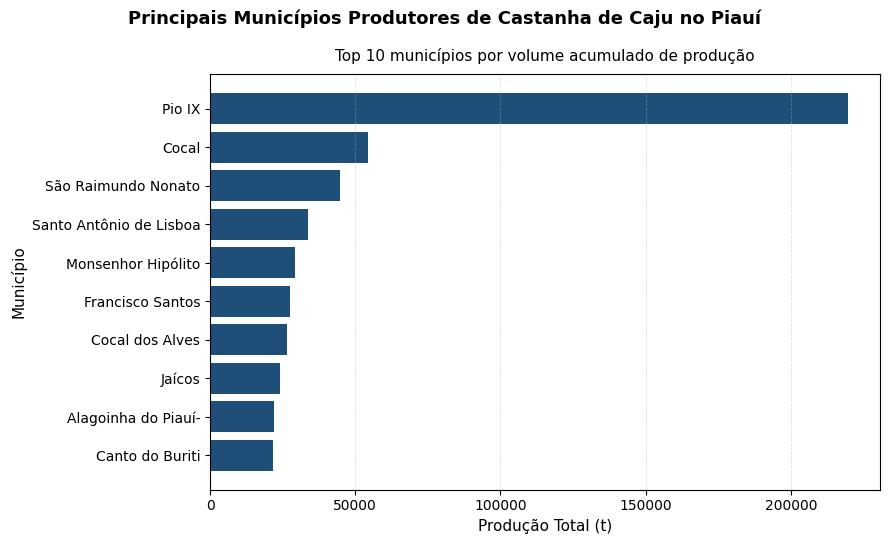

In [ ]:
# Top 10 municípios produtores
top10_municipios = base_castanha_municipal.head(10) # type: ignore

fig, ax = plt.subplots(figsize=(9, 5.5))

ax.barh(
    top10_municipios["nome_municipio"],
    top10_municipios["producao_total"],
    color="#1f4e79"
)

ax.set_xlabel("Produção Total (t)", fontsize=11)
ax.set_ylabel("Município", fontsize=11)
ax.invert_yaxis()
ax.ticklabel_format(style="plain", axis="x")

fig.suptitle(
    "Principais Municípios Produtores de Castanha de Caju no Piauí",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Top 10 municípios por volume acumulado de produção",
    fontsize=11,
    pad=10
)

ax.grid(True, axis="x", linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


Gráfico B3 — Identificação de Clusters Produtivos (Participação Acumulada)

Mostra quantos municípios explicam a maior parte da produção


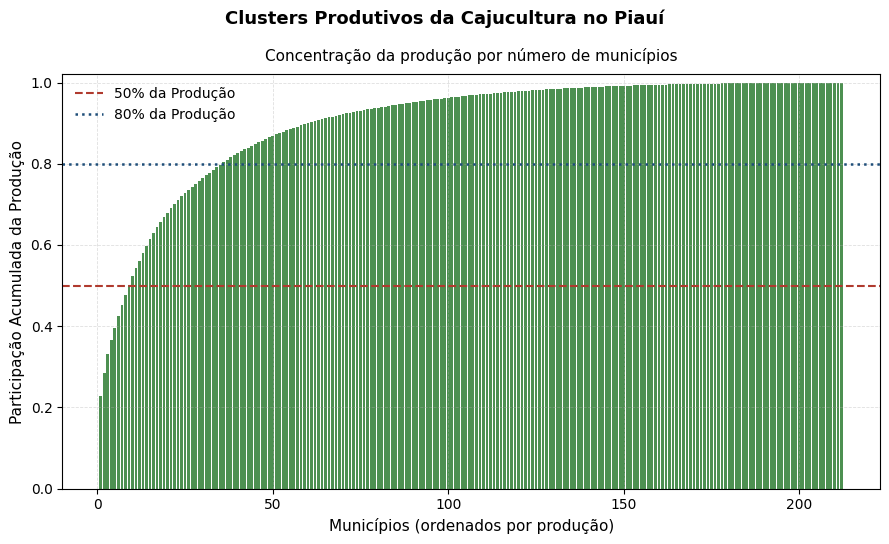

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5.5))

ax.bar(
    range(1, len(base_castanha_municipal) + 1), # type: ignore
    base_castanha_municipal["participacao_acumulada"], # type: ignore
    color="#2e7d32",
    alpha=0.85
)

ax.axhline(
    y=0.5,
    linestyle="--",
    linewidth=1.5,
    color="#b03a2e",
    label="50% da Produção"
)

ax.axhline(
    y=0.8,
    linestyle=":",
    linewidth=1.8,
    color="#1f4e79",
    label="80% da Produção"
)

ax.set_xlabel("Municípios (ordenados por produção)", fontsize=11)
ax.set_ylabel("Participação Acumulada da Produção", fontsize=11)
ax.set_ylim(0, 1.02)

fig.suptitle(
    "Clusters Produtivos da Cajucultura no Piauí",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Concentração da produção por número de municípios",
    fontsize=11,
    pad=10
)

ax.legend(frameon=False, fontsize=10)
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


BLOCO C — Produção × Valor Gerado

Objetivo Específico 4
Bases utilizadas:

piaui_municipios (limpa, municipal, histórica)

concentracao (quando já agregada por município)

- Produto analisado: Castanha de caju
- Escala: Municipal — Estado do Piauí

In [43]:
# Base municipal agregada — Castanha de Caju
base_valor_municipal = (
    piaui_municipios
    [piaui_municipios["produto"] == "Castanha de caju"]
    .groupby("nome_municipio", as_index=False)
    .agg({
        "producao_total": "sum",
        "valor_total_producao": "sum"
    })
)

# Garantir dados válidos
base_valor_municipal = base_valor_municipal.dropna(
    subset=["producao_total", "valor_total_producao"]
)


Gráfico C1 — Produção Total × Valor Total Gerado (Ranking Municipal)

Mostra escala produtiva vs peso econômico
(quem produz muito e quem gera mais valor)

C:\Users\miria\AppData\Local\Temp\ipykernel_5532\4142649655.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(


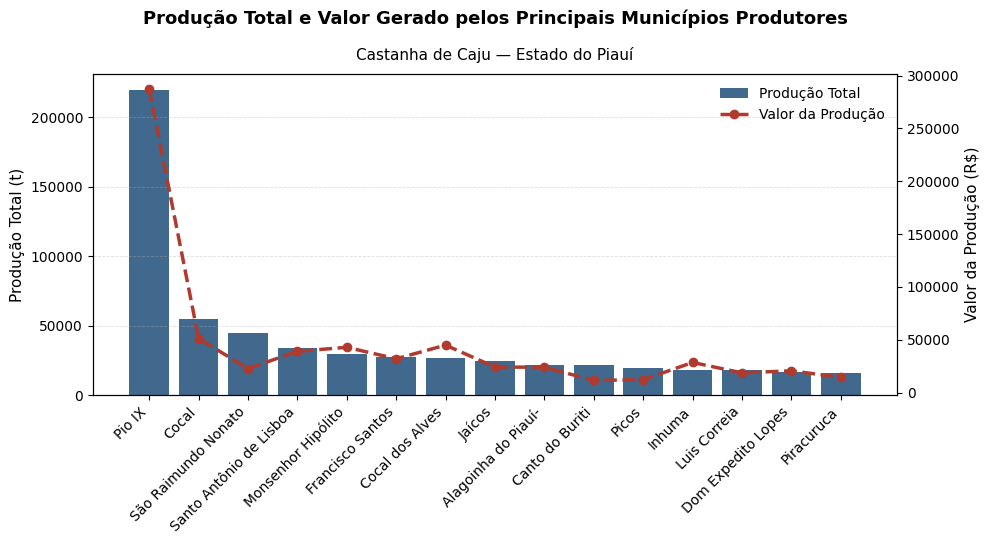

In [44]:
# Ordenar por produção
top15_volume = (
    base_valor_municipal
    .sort_values("producao_total", ascending=False)
    .head(15)
)

fig, ax1 = plt.subplots(figsize=(10, 5.5))

# Barras — Produção Total
ax1.bar(
    top15_volume["nome_municipio"],
    top15_volume["producao_total"],
    color="#1f4e79",
    alpha=0.85,
    label="Produção Total"
)

ax1.set_ylabel("Produção Total (t)", fontsize=11)
ax1.ticklabel_format(style="plain", axis="y")
ax1.tick_params(axis="y", labelsize=10)

# Segundo eixo — Valor da Produção
ax2 = ax1.twinx()
ax2.plot(
    top15_volume["nome_municipio"],
    top15_volume["valor_total_producao"],
    color="#b03a2e",
    linewidth=2.5,
    marker="o",
    linestyle="--",
    label="Valor da Produção"
)

ax2.set_ylabel("Valor da Produção (R$)", fontsize=11)
ax2.ticklabel_format(style="plain", axis="y")
ax2.tick_params(axis="y", labelsize=10)

ax1.set_xticklabels(
    top15_volume["nome_municipio"],
    rotation=45,
    ha="right",
    fontsize=10
)

fig.suptitle(
    "Produção Total e Valor Gerado pelos Principais Municípios Produtores",
    fontsize=13,
    fontweight="bold"
)
ax1.set_title(
    "Castanha de Caju — Estado do Piauí",
    fontsize=11,
    pad=10
)

# Legenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper right",
    frameon=False,
    fontsize=10
)

ax1.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


Gráfico C2 — Valor Gerado por Unidade Produzida (Indicador Econômico Relativo)

Identifica municípios que geram mais valor por unidade de produção, independentemente do volume total.

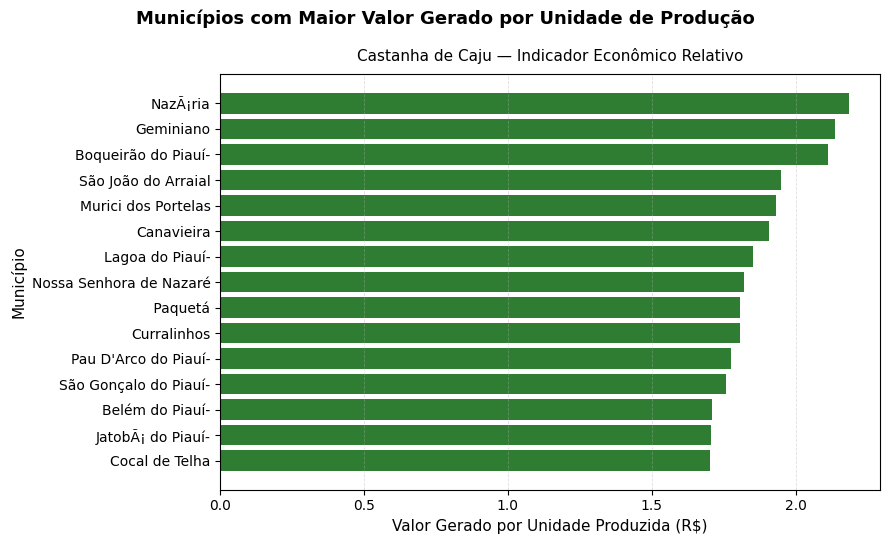

In [ ]:

base_valor_municipal["valor_por_unidade"] = (
    base_valor_municipal["valor_total_producao"]
    / base_valor_municipal["producao_total"]
)


base_valor_municipal = base_valor_municipal.replace([np.inf, -np.inf], np.nan)
base_valor_municipal = base_valor_municipal.dropna(subset=["valor_por_unidade"])


top15_valor_relativo = (
    base_valor_municipal
    .sort_values("valor_por_unidade", ascending=False)
    .head(15)
)

fig, ax = plt.subplots(figsize=(9, 5.5))

ax.barh(
    top15_valor_relativo["nome_municipio"],
    top15_valor_relativo["valor_por_unidade"],
    color="#2e7d32"
)

ax.set_xlabel("Valor Gerado por Unidade Produzida (R$)", fontsize=11)
ax.set_ylabel("Município", fontsize=11)
ax.invert_yaxis()
ax.ticklabel_format(style="plain", axis="x")

fig.suptitle(
    "Municípios com Maior Valor Gerado por Unidade de Produção",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Castanha de Caju — Indicador Econômico Relativo",
    fontsize=11,
    pad=10
)

ax.grid(True, axis="x", linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


Gráfico C3 — Classificação Econômica dos Municípios (Volume × Valor)

Divide os municípios em perfis econômicos
(alto volume / baixo valor, baixo volume / alto valor etc.)

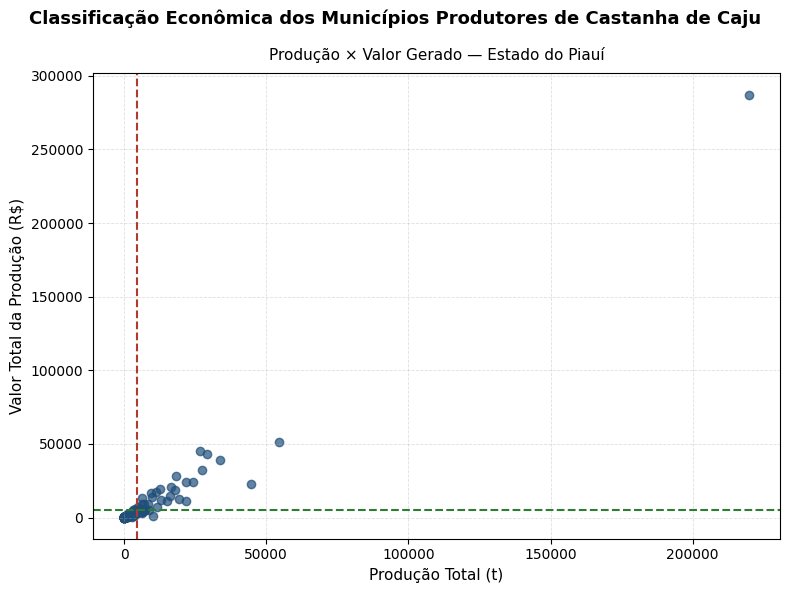

In [46]:

media_producao = base_valor_municipal["producao_total"].mean()
media_valor = base_valor_municipal["valor_total_producao"].mean()

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    base_valor_municipal["producao_total"],
    base_valor_municipal["valor_total_producao"],
    alpha=0.7,
    color="#1f4e79"
)

ax.axvline(media_producao, linestyle="--", color="#b03a2e", linewidth=1.5)
ax.axhline(media_valor, linestyle="--", color="#2e7d32", linewidth=1.5)

ax.set_xlabel("Produção Total (t)", fontsize=11)
ax.set_ylabel("Valor Total da Produção (R$)", fontsize=11)
ax.ticklabel_format(style="plain", axis="both")

fig.suptitle(
    "Classificação Econômica dos Municípios Produtores de Castanha de Caju",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Produção × Valor Gerado — Estado do Piauí",
    fontsize=11,
    pad=10
)

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


BLOCO D — Eficiência Econômica Municipal

Objetivo Específico 4
Base: eficiencia (Tabela 9 — Análise de eficiência econômica municipal)

Gráfico D1 — Ranking de Eficiência Econômica Municipal
(Valor Gerado por Hectare)

Gráfico-chave do Objetivo 4
Mostra quem gera mais valor com menos área

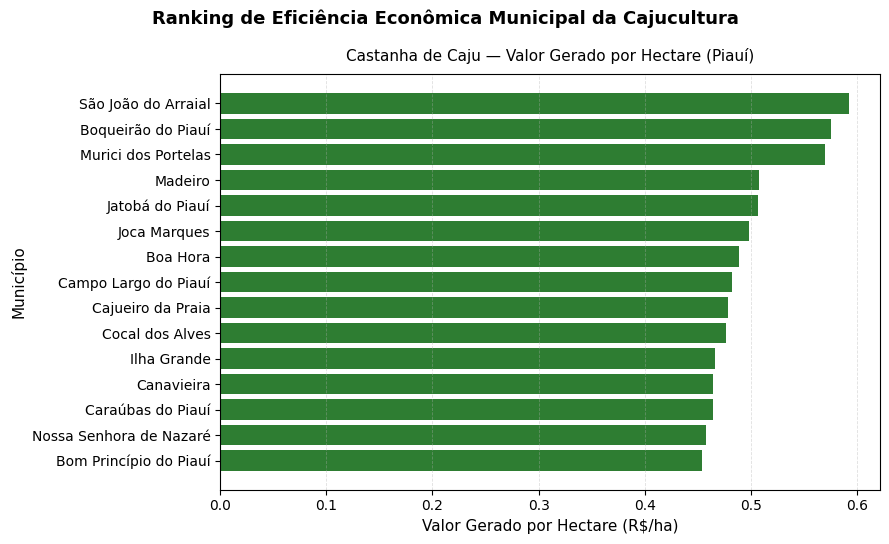

In [47]:

top15_eficiencia = (
    eficiencia
    .dropna(subset=["valor_por_hectare"])
    .sort_values("valor_por_hectare", ascending=False)
    .head(15)
)

fig, ax = plt.subplots(figsize=(9, 5.5))

ax.barh(
    top15_eficiencia["nome_municipio"],
    top15_eficiencia["valor_por_hectare"],
    color="#2e7d32"
)

ax.set_xlabel("Valor Gerado por Hectare (R$/ha)", fontsize=11)
ax.set_ylabel("Município", fontsize=11)
ax.invert_yaxis()
ax.ticklabel_format(style="plain", axis="x")

fig.suptitle(
    "Ranking de Eficiência Econômica Municipal da Cajucultura",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Castanha de Caju — Valor Gerado por Hectare (Piauí)",
    fontsize=11,
    pad=10
)

ax.grid(True, axis="x", linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


Gráfico D2 — Produtividade Física × Retorno Econômico

Mostra se produtividade agronômica se converte em resultado econômico

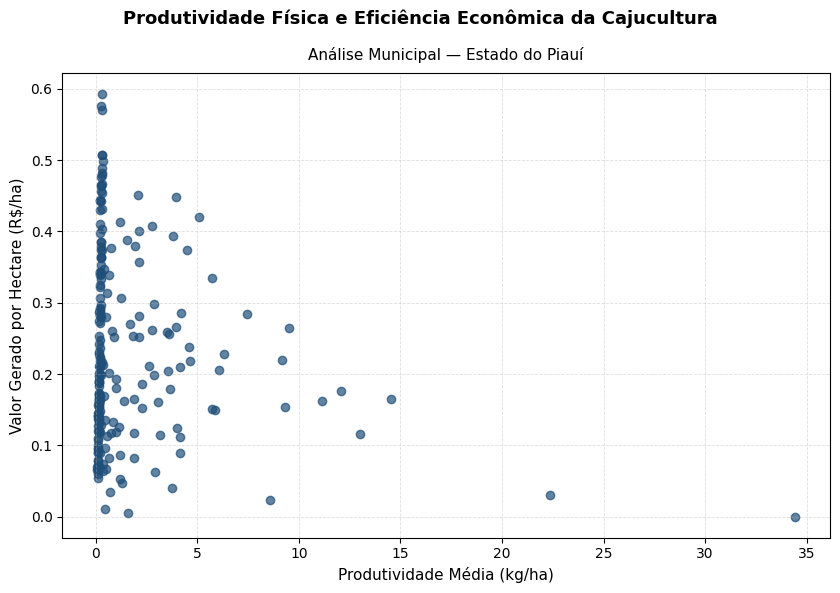

In [48]:
fig, ax = plt.subplots(figsize=(8.5, 6))

ax.scatter(
    eficiencia["produtividade_kg_ha"],
    eficiencia["valor_por_hectare"],
    alpha=0.7,
    color="#1f4e79"
)

ax.set_xlabel("Produtividade Média (kg/ha)", fontsize=11)
ax.set_ylabel("Valor Gerado por Hectare (R$/ha)", fontsize=11)
ax.ticklabel_format(style="plain", axis="both")

fig.suptitle(
    "Produtividade Física e Eficiência Econômica da Cajucultura",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Análise Municipal — Estado do Piauí",
    fontsize=11,
    pad=10
)

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


Gráfico D3 — Municípios Eficientes Fora do Eixo Produtivo Principal

Identifica municípios:

- não líderes em volume
- mas altamente eficientes economicamente

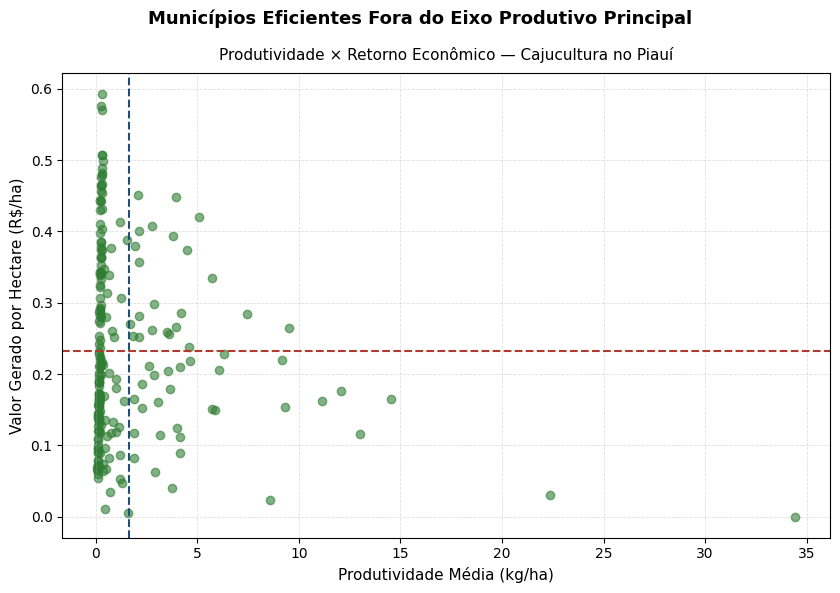

In [49]:

media_prod = eficiencia["produtividade_kg_ha"].mean()
media_valor = eficiencia["valor_por_hectare"].mean()

fig, ax = plt.subplots(figsize=(8.5, 6))

ax.scatter(
    eficiencia["produtividade_kg_ha"],
    eficiencia["valor_por_hectare"],
    alpha=0.6,
    color="#2e7d32"
)

ax.axvline(media_prod, linestyle="--", linewidth=1.5, color="#1f4e79")
ax.axhline(media_valor, linestyle="--", linewidth=1.5, color="#b03a2e")

ax.set_xlabel("Produtividade Média (kg/ha)", fontsize=11)
ax.set_ylabel("Valor Gerado por Hectare (R$/ha)", fontsize=11)
ax.ticklabel_format(style="plain", axis="both")

fig.suptitle(
    "Municípios Eficientes Fora do Eixo Produtivo Principal",
    fontsize=13,
    fontweight="bold"
)
ax.set_title(
    "Produtividade × Retorno Econômico — Cajucultura no Piauí",
    fontsize=11,
    pad=10
)

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

plt.tight_layout()
plt.show()


RESULTADOS

A análise da cajucultura no estado do Piauí, a partir da integração de dados estaduais e municipais da Pesquisa Agrícola Municipal (PAM/IBGE), evidencia uma atividade caracterizada por instabilidade produtiva ao longo do tempo, elevada concentração espacial da produção e acentuada heterogeneidade econômica entre os municípios produtores.

A série histórica estadual (1974–2024) revela que a produção de castanha de caju no Piauí apresenta forte volatilidade interanual. Observam-se picos produtivos superiores a 50 mil toneladas em anos específicos, intercalados por períodos de retração acentuada, quando a produção recua para patamares inferiores a 15 mil toneladas. Esse comportamento sugere elevada sensibilidade da atividade a fatores climáticos, estruturais e institucionais, característica recorrente em sistemas agrícolas dependentes de condições edafoclimáticas e com limitada capacidade de mitigação de riscos (IBGE, 2024).

Em contraste com a instabilidade do volume produzido, o valor da produção apresenta trajetória distinta, sobretudo a partir da década de 2010. Mesmo em períodos de produção física moderada, o valor monetário da cajucultura cresce de forma consistente, atingindo patamares superiores a R$ 80 milhões nos anos mais recentes da série. Esse descolamento entre produção física e valor econômico indica um processo de valorização da produção, possivelmente associado ao aumento dos preços da castanha, à maior demanda do mercado externo e a mudanças na estrutura de comercialização.

A análise conjunta da produção total e da produtividade média (kg/ha) reforça esse diagnóstico. Embora o volume produzido apresente flutuações expressivas, a produtividade média mostra tendência de relativa estabilização e, em determinados períodos, de crescimento. Tal padrão sugere um movimento de intensificação produtiva, no qual ganhos de eficiência técnica compensam, ao menos parcialmente, a limitação da expansão da área colhida, em consonância com a literatura sobre modernização agrícola e uso eficiente dos fatores produtivos (HAYAMI; RUTTAN, 1985).

Ao analisar a distribuição espacial da produção em nível municipal, observa-se um quadro de concentração produtiva extremamente elevado. A curva de concentração da produção municipal indica que aproximadamente 20% dos municípios respondem por cerca de 80% da produção total de castanha de caju no estado, enquanto a maioria dos municípios apresenta participação marginal no volume produzido. Esse resultado evidencia uma estrutura produtiva fortemente assimétrica, típica de atividades agrícolas organizadas em polos territoriais especializados.

O ranking dos principais municípios produtores confirma esse padrão. O município de Pio IX destaca-se de forma expressiva, apresentando produção acumulada substancialmente superior à dos demais municípios, configurando-se como o principal polo da cajucultura piauiense. Em seguida, um grupo restrito de municípios — como Cocal, São Raimundo Nonato, Santo Antônio de Lisboa e Monsenhor Hipólito — apresenta participação relevante, porém significativamente inferior à do líder. A partir desse grupo, observa-se queda rápida da produção, reforçando a elevada desigualdade espacial.

A análise dos clusters produtivos revela que menos de 40 municípios são suficientes para concentrar aproximadamente 80% da produção estadual, enquanto mais de 200 municípios compartilham os 20% restantes. Tal configuração sugere a existência de territórios altamente especializados, contrastando com uma ampla periferia produtiva de baixa intensidade.

Quando se analisa a relação entre produção física e valor econômico gerado em nível municipal, os resultados indicam que alto volume de produção não garante, necessariamente, maior retorno econômico. Municípios com produção intermediária ou mesmo reduzida apresentam, em alguns casos, valor econômico proporcionalmente mais elevado, evidenciando diferenças significativas na capacidade de captura de valor ao longo da cadeia produtiva.

Essa heterogeneidade torna-se ainda mais clara na análise da eficiência econômica municipal, medida pelo valor gerado por hectare. Os municípios mais eficientes — como São João do Arraial, Boqueirão do Piauí e Murici dos Portelas — não figuram entre os maiores produtores em termos de volume absoluto. Esses municípios apresentam valores superiores a R$ 0,55 por hectare, enquanto diversos municípios com grande escala produtiva registram retornos significativamente inferiores. Esse resultado indica que a eficiência econômica está mais associada à organização produtiva, à gestão e à inserção mercadológica do que ao volume produzido isoladamente.

Por fim, a relação entre produtividade física e eficiência econômica revela elevada dispersão dos dados, sem evidência de correlação linear forte. Municípios com produtividade relativamente baixa conseguem gerar elevado valor por hectare, enquanto outros, mesmo com produtividade elevada, apresentam baixo retorno econômico. Esse padrão reforça a ideia de que a eficiência econômica na cajucultura piauiense depende fortemente de fatores institucionais, logísticos e comerciais.

DISCUSSÃO

Os resultados obtidos dialogam diretamente com a literatura sobre especialização produtiva, concentração territorial e cadeias agroindustriais, evidenciando que a cajucultura no Piauí apresenta características típicas de atividades organizadas em clusters territoriais (PORTER, 1998).

A elevada concentração da produção em poucos municípios confirma a hipótese de que vantagens competitivas locais — como disponibilidade de recursos naturais, conhecimento acumulado, infraestrutura e redes institucionais — desempenham papel central na organização territorial da atividade. Contudo, conforme argumentam Fujita, Krugman e Venables (1999), estruturas altamente concentradas também ampliam a vulnerabilidade sistêmica da atividade, tornando-a mais sensível a choques climáticos, econômicos e institucionais.

A dissociação observada entre produção física e valor econômico gerado corrobora os pressupostos da literatura sobre cadeias globais de valor, segundo a qual o valor capturado pelos produtores depende menos do volume produzido e mais da posição ocupada na cadeia, do grau de coordenação e da capacidade de acessar mercados mais dinâmicos (GEREFFI; HUMPHREY; STURGEON, 2005). No caso da cajucultura piauiense, os resultados sugerem que grande parte dos municípios permanece inserida em segmentos de baixa captura de valor.

A identificação de municípios com elevada eficiência econômica, mas baixa participação na produção total, reforça a importância da gestão e da eficiência alocativa, conforme destacado por Schultz (1964). Esses municípios parecem compensar limitações de escala por meio de melhor uso dos fatores produtivos, estratégias produtivas mais eficientes e, possivelmente, maior articulação com mercados diferenciados.

Do ponto de vista das políticas públicas, os resultados indicam que estratégias focadas exclusivamente na expansão da produção física tendem a apresentar retornos limitados. O fortalecimento da cajucultura no Piauí requer políticas integradas que promovam organização produtiva, acesso a mercados, infraestrutura logística e agregação de valor, alinhando-se às recomendações da literatura sobre desenvolvimento rural e agroindustrial (BUAINAIN et al., 2014).

REFERÊNCIAS (ABNT)

BUAINAIN, Antônio Márcio et al. O mundo rural no Brasil do século XXI. Brasília: Embrapa, 2014.
Disponível em: https://www.embrapa.br
. Acesso em: 2026.

FUJITA, Masahisa; KRUGMAN, Paul; VENABLES, Anthony J. The spatial economy: cities, regions, and international trade. Cambridge: MIT Press, 1999.
Disponível em: https://mitpress.mit.edu
. Acesso em: 2026.

GEREFFI, Gary; HUMPHREY, John; STURGEON, Timothy. The governance of global value chains. Review of International Political Economy, v. 12, n. 1, p. 78–104, 2005.
Disponível em: https://www.tandfonline.com
. Acesso em: 2026.

HAYAMI, Yujiro; RUTTAN, Vernon W. Agricultural development: an international perspective. Baltimore: Johns Hopkins University Press, 1985.
Disponível em: https://jhupbooks.press.jhu.edu
. Acesso em: 2026.

IBGE. Pesquisa Agrícola Municipal (PAM). Rio de Janeiro: Instituto Brasileiro de Geografia e Estatística, 2024.
Disponível em: https://www.ibge.gov.br
. Acesso em: 2026.

PORTER, Michael E. Clusters and the new economics of competition. Harvard Business Review, v. 76, n. 6, p. 77–90, 1998.
Disponível em: https://hbr.org
. Acesso em: 2026.

SCHULTZ, Theodore W. Transforming traditional agriculture. New Haven: Yale University Press, 1964.
Disponível em: https://yalebooks.yale.edu
. Acesso em: 2026.